## Random forest

An Overview of Random Forests

Random forests are a popular supervised machine learning algorithm.

    Random forests are for supervised machine learning, where there is a labeled target variable.
    Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
    Random forests are an ensemble method, meaning they combine predictions from other models.
    Each of the smaller models in the random forest ensemble is a decision tree.
### How Random Forest Classification works

Imagine you have a complex problem to solve, and you gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision.

In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. (For regression, predictions use an averaging technique instead.)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz
import random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
iris_bunch = load_iris(as_frame=True)
iris_df = iris_bunch.frame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = iris_df.drop(columns={'target'})
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = RandomForestClassifier(max_depth=14, max_features=12)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [4]:
X = iris_df.drop(columns={'target'})
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

{'max_depth': 10, 'max_features': 3}
0.9445454545454547


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lovecrush/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/lovecrush/

In [5]:
# accuracy_score(y_test, y_preds)

## using Random forest with digits dataset

In [6]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
digit_df = load_digits()
digit_df.data 
# not using this property to get image, it's not image and I don't know what this data is.

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digit_df.keys()
# this kind of digit dataset turns out was a dictionary, these one below is its keys

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [51]:
digit_df.target
# focus on the target and the image data, also the descr

array([0, 1, 2, ..., 8, 9, 8])

In [49]:
digit_df.images[1:4] ,\
f"Shape of images {digit_df.images.shape}"

(array([[[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]],
 
        [[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
         [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
         [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
         [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
         [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]],
 
        [[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
         [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
         [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
         [ 0.,  0.,  2., 

In [11]:
print(digit_df.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

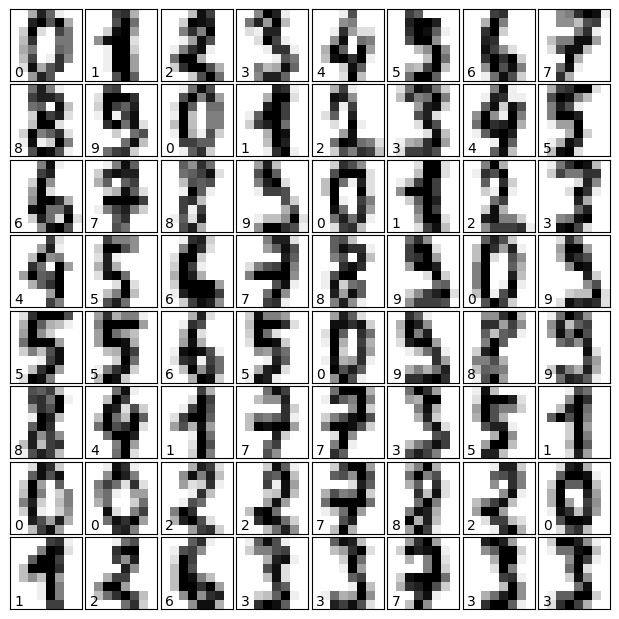

In [12]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit_df.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digit_df.target[i]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digit_df.data, digit_df.target, random_state=16, )

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        48
           4       1.00      0.96      0.98        50
           5       0.95      1.00      0.98        40
           6       1.00      1.00      1.00        42
           7       0.98      0.98      0.98        57
           8       0.96      0.93      0.95        46
           9       0.95      0.97      0.96        40

    accuracy                           0.98       450
   macro avg       0.98      0.99      0.98       450
weighted avg       0.98      0.98      0.98       450



In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9844444444444445

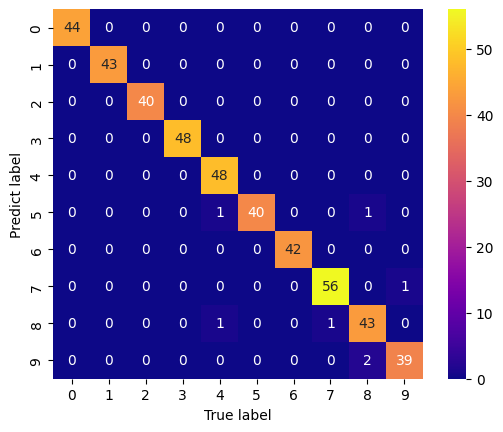

In [58]:
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cmap='plasma')

plt.xlabel("True label")
plt.ylabel("Predict label")
plt.show()
